In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./sourceImages/W_A1_0_3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)

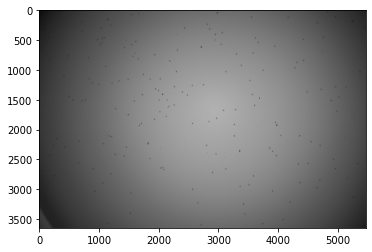

In [3]:
plt.imshow(img)

In [4]:
grayImg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

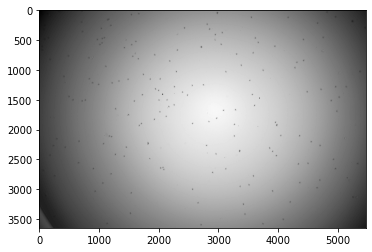

In [5]:
plt.imshow(grayImg, cmap='gray')

In [6]:
hist, bin_edges = np.histogram(grayImg.flatten(), bins=range(256), density=True)

<BarContainer object of 255 artists>

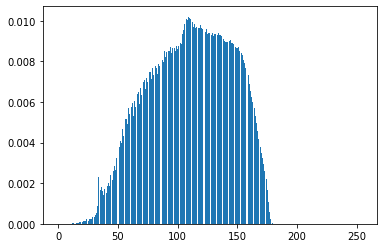

In [7]:
plt.bar(bin_edges[:-1], height=hist)

<BarContainer object of 255 artists>

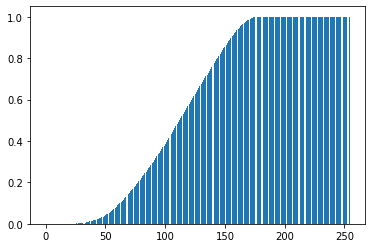

In [8]:
plt.bar(bin_edges[:-1], height=np.cumsum(hist))

In [9]:
newScale = 255 * np.cumsum(hist)
newScale = np.concatenate([newScale, [newScale[-1]]], axis=0)
newScale = newScale.astype(np.uint8)

In [10]:
newGrayImg = newScale[grayImg]

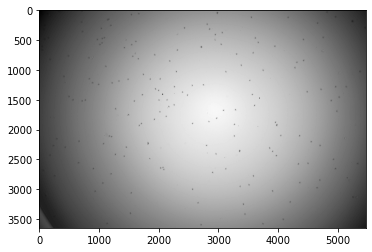

In [11]:
plt.imshow(grayImg, cmap='gray')

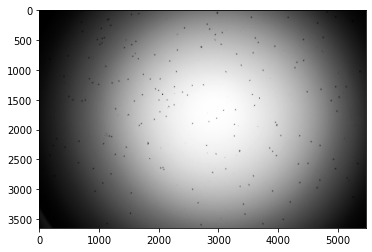

In [12]:
plt.imshow(newGrayImg, cmap='gray')

<BarContainer object of 255 artists>

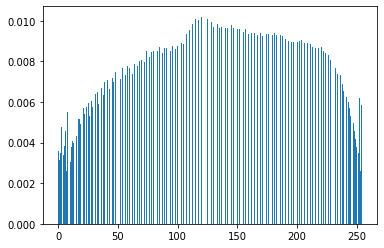

In [13]:
hist, bin_edges = np.histogram(newGrayImg.flatten(), bins=range(256), density=True)
plt.bar(bin_edges[:-1], height=hist)

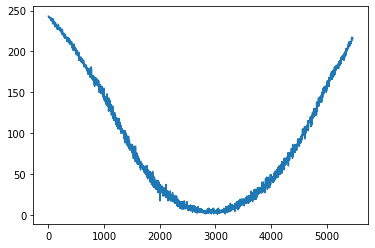

In [14]:
plt.plot(255-newGrayImg[2000, :])

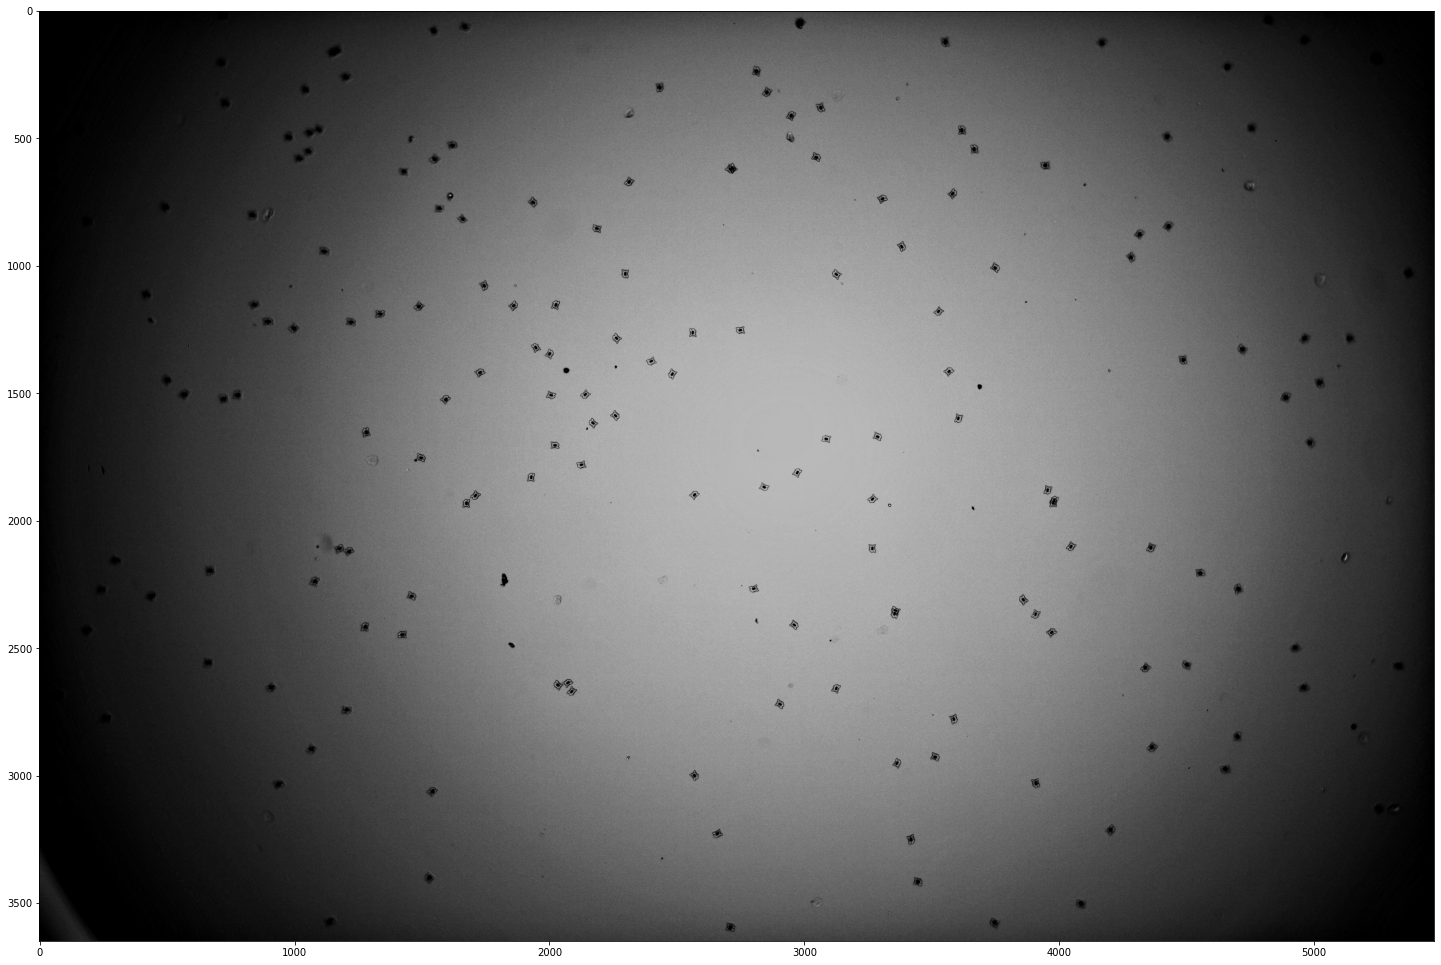

In [16]:
blur_img = cv2.GaussianBlur(newGrayImg, (0, 0), 100)
usm = cv2.addWeighted(newGrayImg, 1.5, blur_img, -1, 0)
plt.figure(figsize=(25,25))
plt.imshow(usm, cmap='gray')

In [17]:
thresh2 = cv2.adaptiveThreshold(usm, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

In [18]:
thresh = np.ones(thresh2.shape, dtype=np.uint8)
thresh[thresh2 != 0] = 0

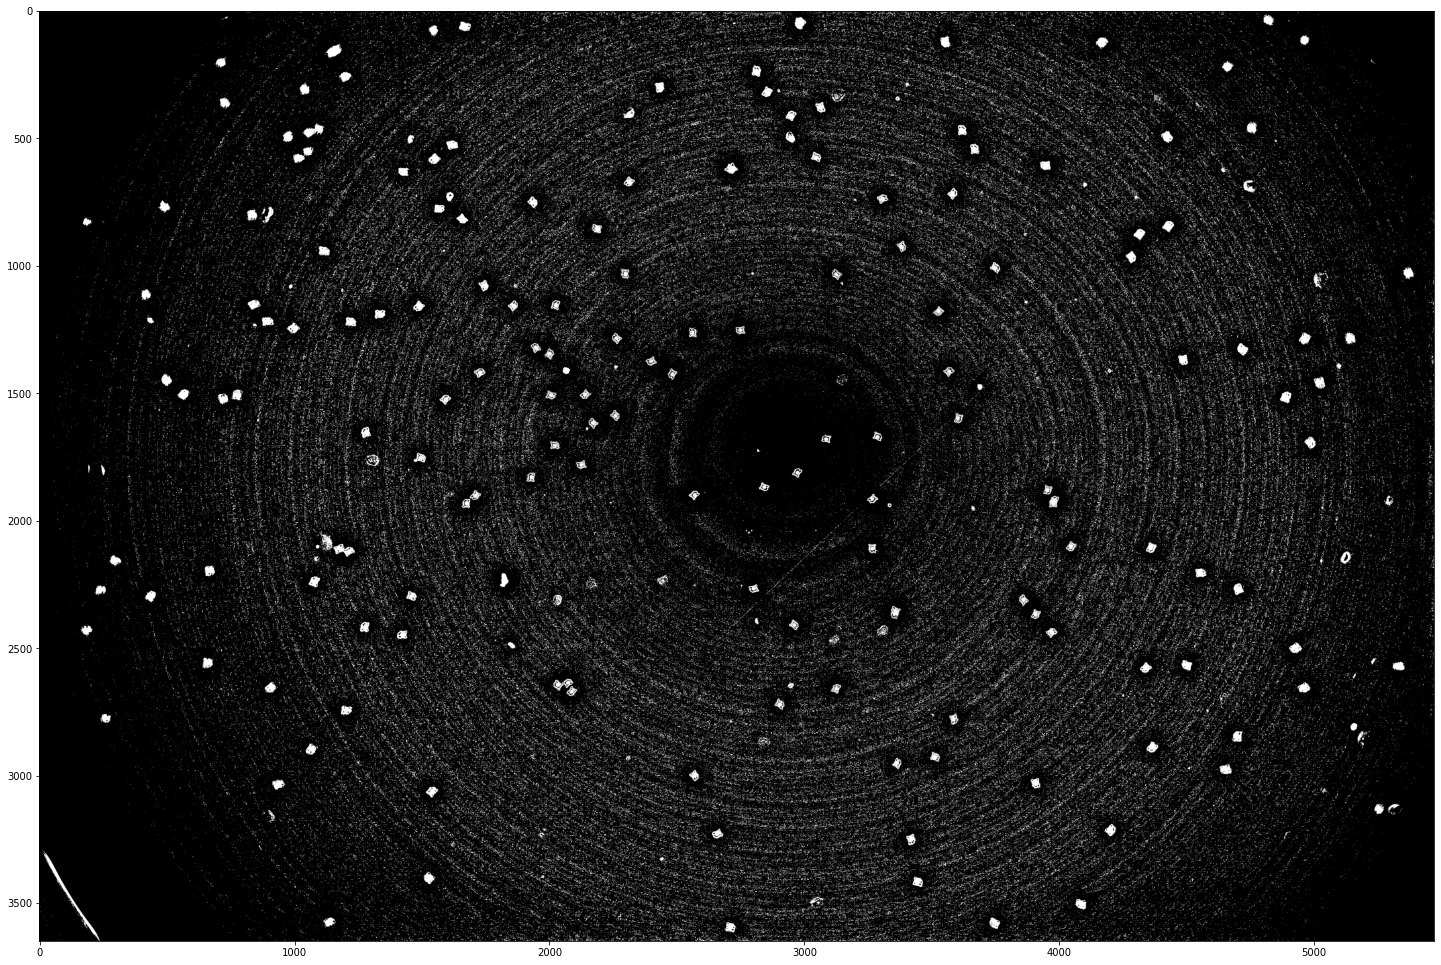

In [20]:
plt.figure(figsize=(25,25))
plt.imshow(thresh, cmap='gray')

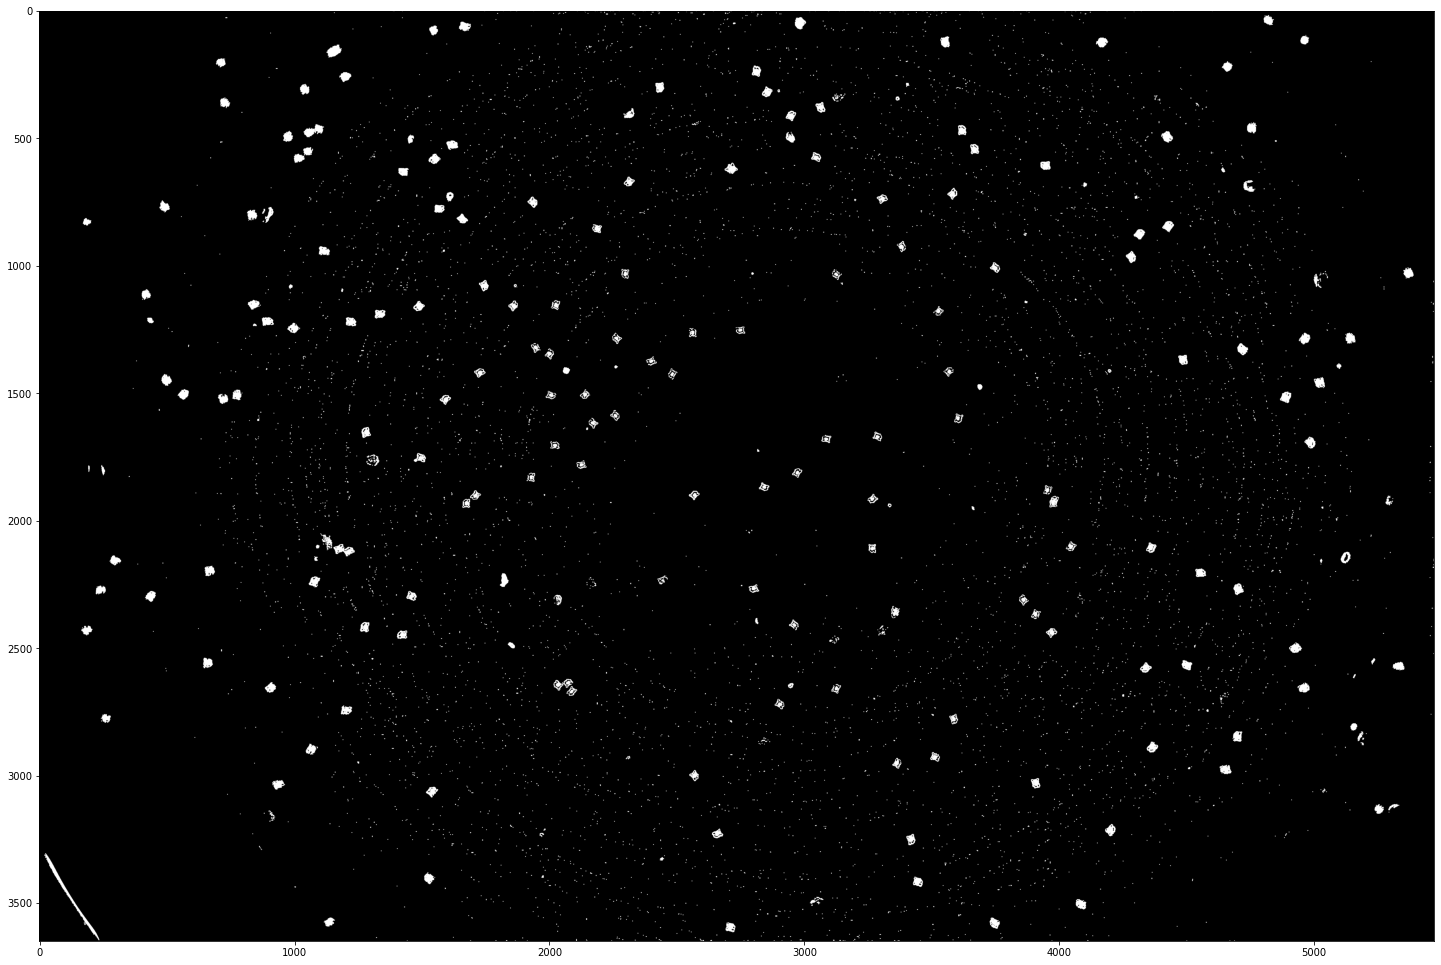

In [71]:
out = cv2.erode(thresh, np.ones([3, 3]), iterations=1)
out = cv2.dilate(out, np.ones([3, 3]), iterations=1)

plt.figure(figsize=(25,25))
plt.imshow(out, cmap='gray')

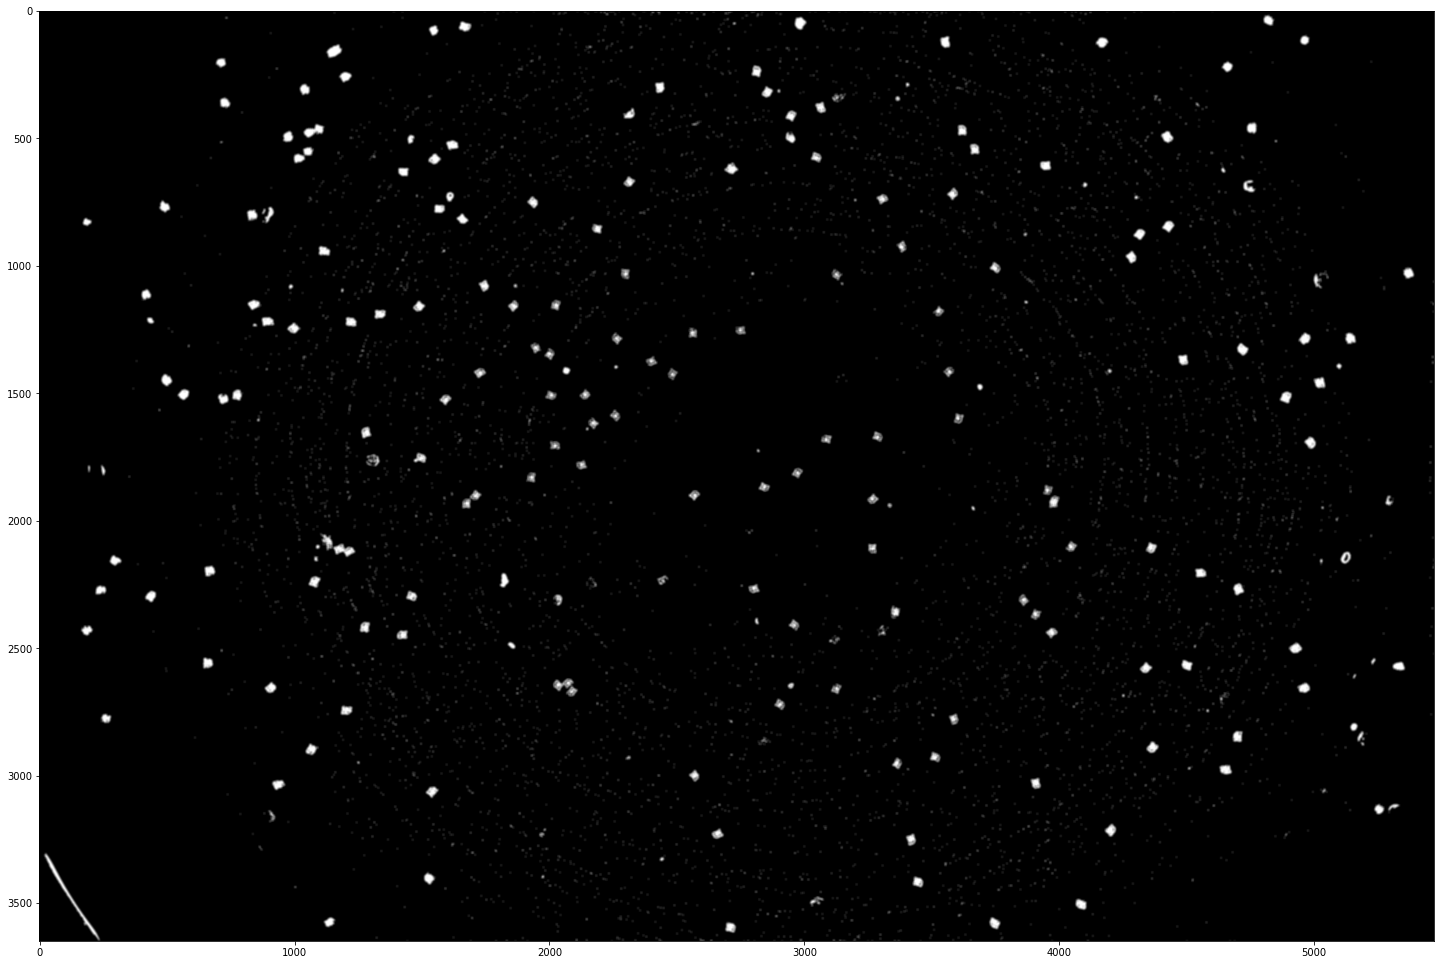

In [72]:
from scipy.signal import convolve2d

g = convolve2d(out, np.ones([10, 10]), mode='same')

plt.figure(figsize=(25,25))
plt.imshow(g, cmap='gray')

In [59]:
output = cv2.connectedComponentsWithStats(out, 8, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [60]:
uni, cnt = np.unique(labels, return_counts=True)

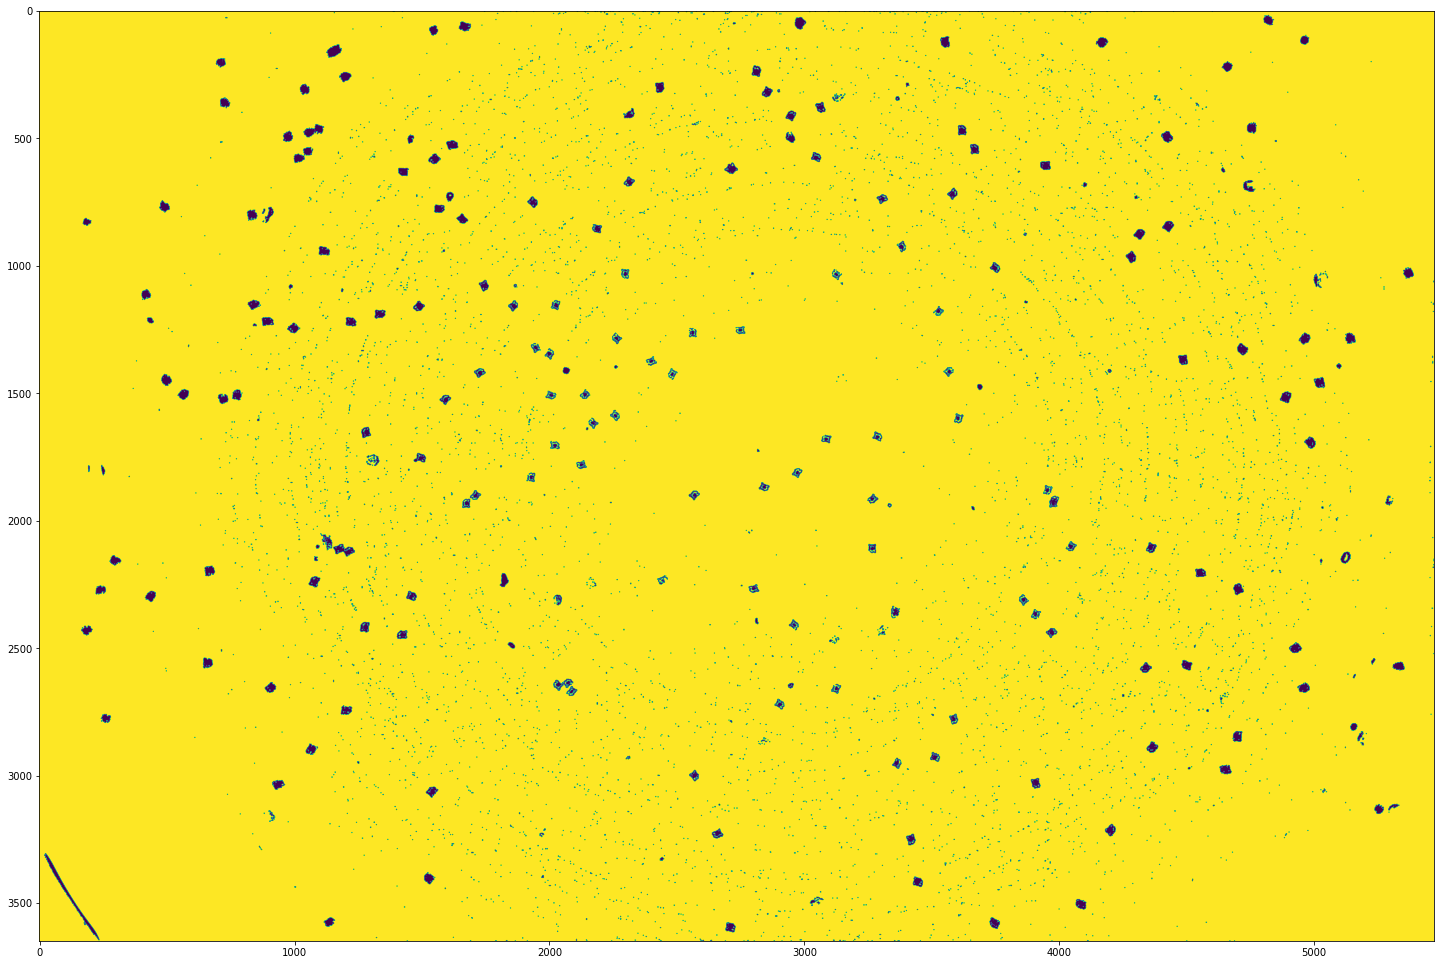

In [63]:
a = np.zeros_like(labels)
a[labels == 0] = 1

plt.figure(figsize=(25,25))
plt.imshow(a)

In [83]:
labels_copy = labels.copy()
for u, c in zip(uni, cnt):
    if c < 50:       
        labels_copy[labels_copy == u] = 0

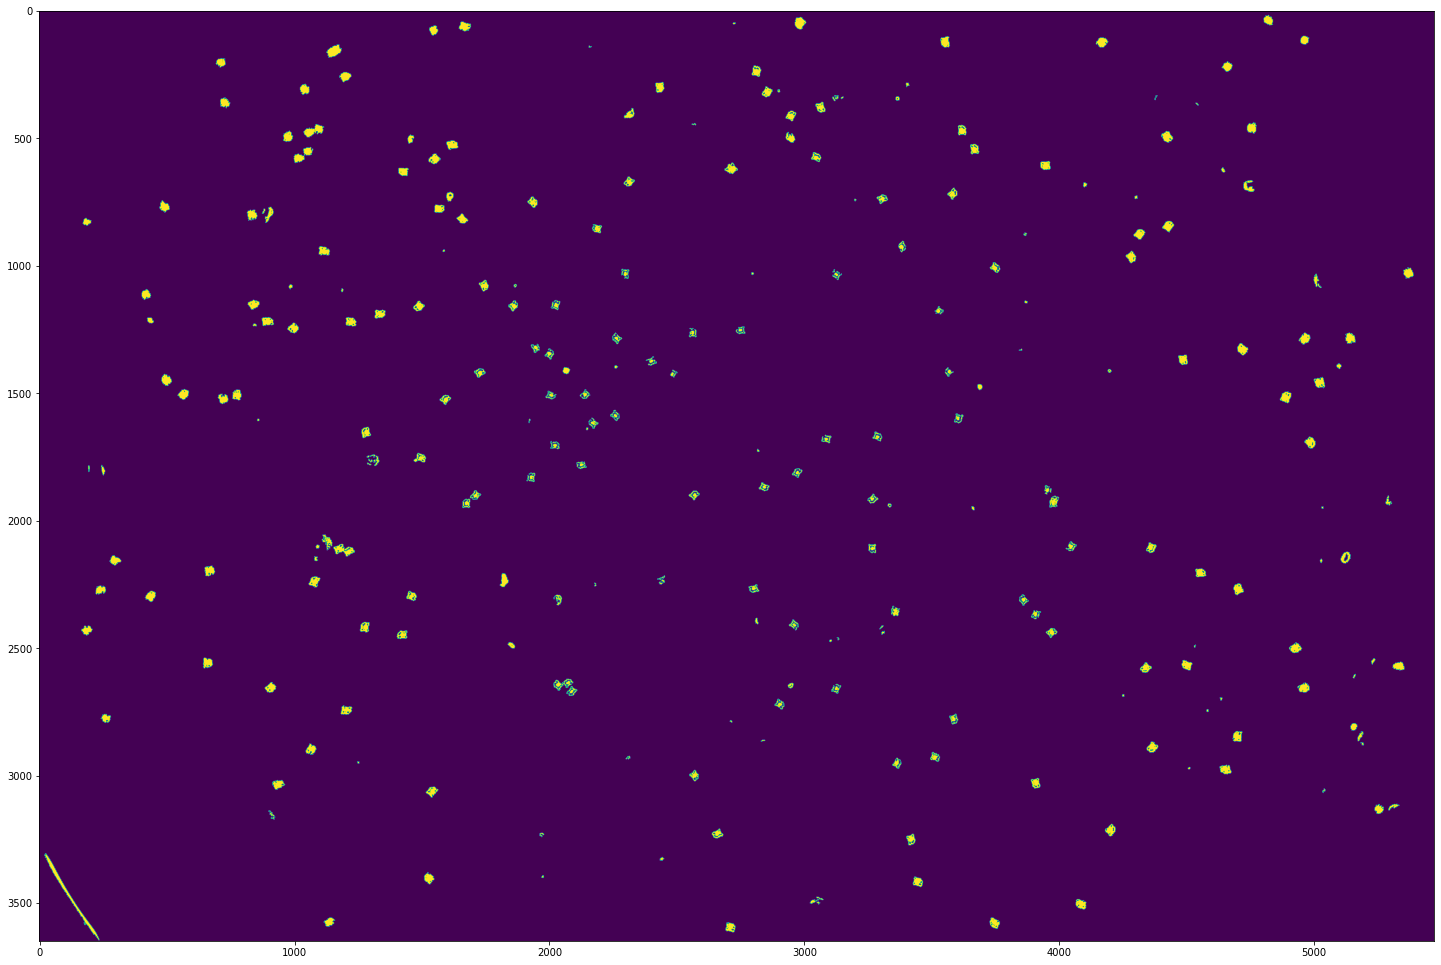

In [84]:
m = np.zeros_like(out)
m[labels_copy != 0] = 1
plt.figure(figsize=(25,25))
plt.imshow(m)